1

In [176]:
# Imporing the libraries

# Basic required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data Modelling
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error

In [120]:
df = pd.read_csv("dataset/Lagos_Housing.csv")
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,title_Detached Duplex,title_Terraced Duplexes,title_Semi Detached Duplex,title_Detached Bungalow,title_Block of Flats,title_Semi Detached Bungalow,title_Terraced Bungalow,log_price
0,4.0,5.0,5.0,4.0,Detached Duplex,15,0,120000000.0,1,0,0,0,0,0,0,18.603002
1,4.0,4.0,5.0,6.0,Detached Duplex,38,0,40000000.0,1,0,0,0,0,0,0,17.504390
2,4.0,4.0,5.0,2.0,Semi Detached Duplex,15,0,75000000.0,0,0,1,0,0,0,0,18.132999
3,5.0,5.0,6.0,1.0,Detached Duplex,15,0,450000000.0,1,0,0,0,0,0,0,19.924758
4,4.0,5.0,5.0,4.0,Detached Duplex,15,0,65000000.0,1,0,0,0,0,0,0,17.989898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18019,4.0,5.0,5.0,4.0,Semi Detached Duplex,15,0,110000000.0,0,0,1,0,0,0,0,18.515991
18020,3.0,4.0,4.0,5.0,Detached Duplex,15,0,80000000.0,1,0,0,0,0,0,0,18.197537
18021,4.0,5.0,5.0,4.0,Detached Duplex,15,0,68000000.0,1,0,0,0,0,0,0,18.035018
18022,3.0,4.0,4.0,3.0,Block of Flats,8,0,78000000.0,0,0,0,0,1,0,0,18.172219


In [121]:
df.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price', 'title_Detached Duplex', 'title_Terraced Duplexes',
       'title_Semi Detached Duplex', 'title_Detached Bungalow',
       'title_Block of Flats', 'title_Semi Detached Bungalow',
       'title_Terraced Bungalow', 'log_price'],
      dtype='object')

# Feature Engineering

In [122]:
dropped_columns= ["price", "title", "state"]
df.drop(dropped_columns, axis= 1, inplace= True)
df

,bedrooms,bathrooms,toilets,parking_space,town,title_Detached Duplex,title_Terraced Duplexes,title_Semi Detached Duplex,title_Detached Bungalow,title_Block of Flats,title_Semi Detached Bungalow,title_Terraced Bungalow,log_price
0,4.0,5.0,5.0,4.0,15,1,0,0,0,0,0,0,18.603002
1,4.0,4.0,5.0,6.0,38,1,0,0,0,0,0,0,17.504390
2,4.0,4.0,5.0,2.0,15,0,0,1,0,0,0,0,18.132999
3,5.0,5.0,6.0,1.0,15,1,0,0,0,0,0,0,19.924758
4,4.0,5.0,5.0,4.0,15,1,0,0,0,0,0,0,17.989898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18019,4.0,5.0,5.0,4.0,15,0,0,1,0,0,0,0,18.515991
18020,3.0,4.0,4.0,5.0,15,1,0,0,0,0,0,0,18.197537
18021,4.0,5.0,5.0,4.0,15,1,0,0,0,0,0,0,18.035018
18022,3.0,4.0,4.0,3.0,8,0,0,0,0,1,0,0,18.172219


In [123]:
# Scaling the data

In [124]:
X = df.drop("log_price", axis= 1)
y = df["log_price"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [125]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state= 42)

In [126]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Baseline Model
 We will create a baseline model of the median of the prices.

In [127]:
base_model = LinearRegression()
base_model.fit(X_scaled, y_train)

LinearRegression()

In [128]:
base_model.score(X_scaled, y_train)

0.5362709739269753

In [129]:
base_preds = base_model.predict(X_scaled)
print(f"The R2 score of our baseline model {base_model.score(X_scaled, y_train)}")
print(f"The MSE score of our baseline model {mean_squared_log_error(y_train, base_preds)}")
print(f"The MAE score of our baseline model {mean_absolute_error(y_train, base_preds)}")

The R2 score of our baseline model 0.5362709739269753
The MSE score of our baseline model 0.000977658931618665
The MAE score of our baseline model 0.4697753946379268


We will be using this as our baseline model to calculate the accuracy of our model

# Modelling

In [ ]:
def modelling(model, X, y):
    model.fit(X, y)
    preds = model.predict(X)
    print(f"R2 score: {r2_score(y, preds)}")
    print(f"MSLE score: {mean_squared_log_error(y, preds)}")
    print(f"MAE score: {mean_absolute_error(y, preds)}")

In [131]:
model = RandomForestRegressor()
modelling(model, X_train, y_train)

R2 score: 0.8148581769944718
MSE score: 0.00038854653185030216
MAE score: 0.2832102912077249


In [132]:
model2 = SVR()
modelling(model2, X_scaled, y_train)

R2 score: 0.7131458792074497
MSE score: 0.0006092488698063855
MAE score: 0.3483781375717888


In [133]:
model3 = XGBRegressor()
modelling(model3, X_train, y_train)

R2 score: 0.8046463052131145
MSE score: 0.0004111505547549937
MAE score: 0.29344485227000067


We will drop SVR model and go further with Random Forest

In [134]:
# Random Forest Regressor
cross_rf = cross_val_score(model, X= X_val, y= y_val, cv= 5)
print(np.mean(cross_rf))

0.711451561090229


In [135]:
# XGBoost
cross_xg = cross_val_score(model3, X= X_val, y= y_val, cv= 5)
print(np.mean(cross_xg))

0.7032201320998717


The models are clearly overfitting, we will be using randomized

In [136]:
rf_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2'],
    'bootstrap': [True, False]
}

xgb_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [1, 1.5, 2],  # L2 regularization
}


In [137]:
# Random Forest Regressor
rs_rf = RandomizedSearchCV(RandomForestRegressor(random_state= 42),
                        param_distributions= rf_grid,
                        n_iter= 100,
                        cv = 5,
                        verbose= True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   verbose=True)

In [138]:
rs_xg = RandomizedSearchCV(XGBRegressor(),
                        param_distributions= xgb_grid,
                        n_iter= 100,
                        cv = 5,
                        verbose= True)

rs_xg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=True)

# Training a model with the best parameters

In [139]:
best_rf_model = rs_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', min_samples_leaf=2, n_estimators=400,
                      random_state=42)

In [140]:
print("Training Evaluations")
modelling(best_rf_model, X_train, y_train)
print("\nValidation Evaluations")
modelling(best_rf_model, X_val, y_val)

Training Evaluations
R2 score: 0.7843486551180588
MSE score: 0.00045549930024439206
MAE score: 0.3105755448676938

Validation Evaluations
R2 score: 0.7799473834254733
MSE score: 0.0004588514077046622
MAE score: 0.31267047672291387


In [141]:
best_xg_model = rs_xg.best_estimator_
best_xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

In [142]:
print("Training Evaluations")
modelling(best_xg_model, X_train, y_train)
print("\nValidation Evaluations")
modelling(best_xg_model, X_val, y_val)

Training Evaluations
R2 score: 0.7936332259668181
MSE score: 0.0004350440017961739
MAE score: 0.30527872978219994

Validation Evaluations
R2 score: 0.8125651081754954
MSE score: 0.0003875040969238831
MAE score: 0.28766030284685795


XGBoost Regression produces the best R2 score as well the lowest error. It also generalizes better than random forest. We will now perform GridSearchCV to try to improve the model further.

In [154]:
final_param_grid = {'learning_rate': [0.005, 0.01, 0.02],
                    'subsample': [0.5, 0.6, 0.7],
                    'colsample_bytree': [0.5, 0.6, 0.7],
                    'reg_alpha': [0, 0.1],
                    'reg_lambda': [1.0, 1.5, 2.0]
                    }

In [155]:
final_xg_model = GridSearchCV(best_xg_model,
                param_grid= final_param_grid,
                cv = 5,
                verbose= True)

final_xg_model.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.6,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=10, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=600,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7],
                         'learning_rate': [0.005, 0.01, 0.02],
                         'reg_alpha': [0, 0.1], 'reg_lambda': [1.0, 1.5, 2.0],
                         'subsample': [0.5, 0.6, 0.7]},
             verbose=True)

In [161]:
final_xg_model.score(X_val, y_val)

0.7442564455183532

In [162]:
best_model = final_xg_model.best_estimator_

print("Training scores")
modelling(best_model, X_train, y_train)
print("\nValidation scores")
modelling(best_model, X_val, y_val)

Training scores
R2 score: 0.7907823702590046
MSE score: 0.00044137945512878805
MAE score: 0.30703987207504585

Validation scores
R2 score: 0.8066159907220466
MSE score: 0.0004006987103137561
MAE score: 0.2929764459102069


After a lot of experimentation, it seems like we have done the best model.

# Evaluation on Test Set

In [173]:
y_preds = best_model.predict(X_test)

print("R2 Score:" , r2_score(y_test, y_preds))
print("Mean Squared Log Error:" , mean_squared_log_error(y_test, y_preds))
print("Mean Absolute Error:" , mean_absolute_error(y_test, y_preds))
print("Mean Squared Error:" , mean_squared_error(y_test, y_preds))
print("Root Mean Squared Error:" , np.sqrt(mean_squared_error(y_test, y_preds)))

R2 Score: 0.8015042229049876
Mean Squared Log Error: 0.0004182338136642847
Mean Absolute Error: 0.3014170955809629
Mean Squared Error: 0.16130690740603118
Root Mean Squared Error: 0.40163031186158143


From our scoring and error analysis, we can see that there is a consistent model and this model is not overfitting or underfitting.


# Conclusion and Summary

### Feature Importance

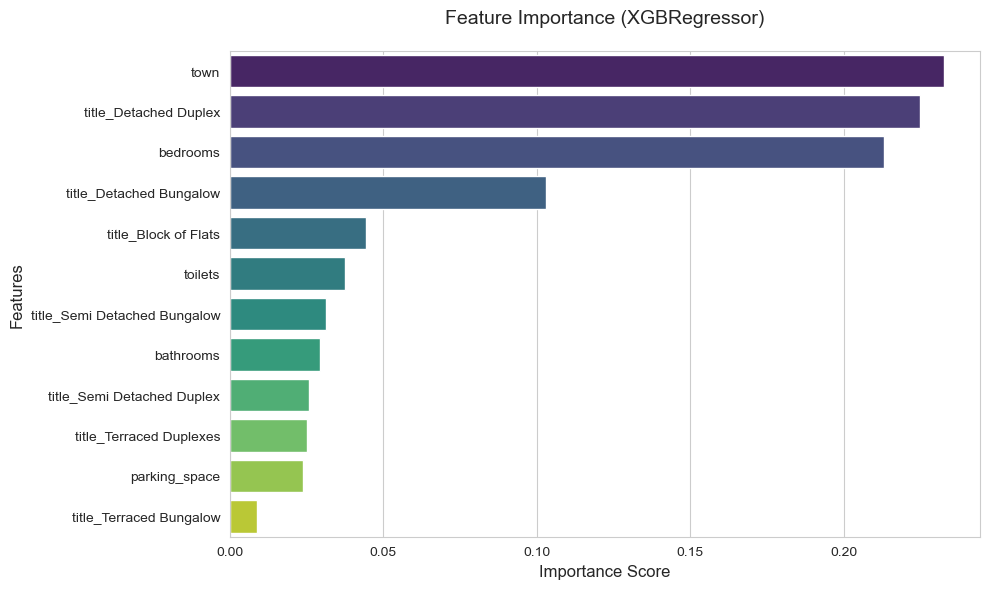

In [196]:
feature_imp = pd.DataFrame({"Features": df.columns.drop("log_price"), 
                            "Importance":best_model.feature_importances_}).sort_values("Importance", ascending= False)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.barplot(x='Importance', 
            y='Features', 
            data=feature_imp,
            palette='viridis'
);

plt.title(f'Feature Importance ({best_model.__class__.__name__})', pad=20, fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()

### Predicted VS Actual Prices

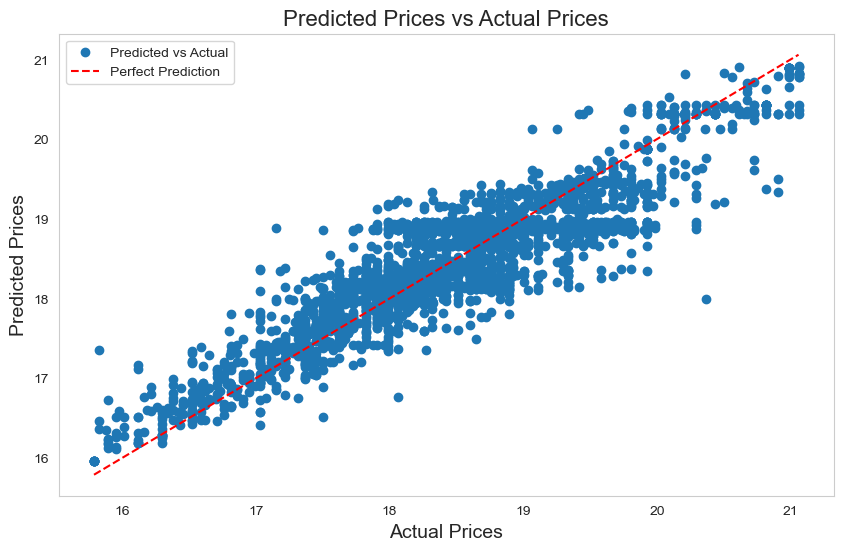

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_preds, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Predicted Prices vs Actual Prices', fontsize=16)
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Summary